# EDA (Exploratory Data Analysis) and Machine Learning Model for COVID-19
The Data used for making these models has been taken from https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv.
Data has been considered from 22nd January, 2020 to 28th March, 2020.

### 1. EDA

Importing the necessary libraries.

In [47]:
import numpy as np
import pandas as pd

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import seaborn as sns
sns.set()
from datetime import datetime

Loading the data from the train.csv file into a pandas dataframe.

In [49]:
df=pd.read_csv("train.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16884 entries, 0 to 16883
Data columns (total 8 columns):
Province/State    5226 non-null object
Country/Region    16884 non-null object
Lat               16884 non-null float64
Long              16884 non-null float64
Date              16884 non-null object
Confirmed         16884 non-null int64
Deaths            16884 non-null int64
Recovered         16884 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.0+ MB


In [51]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,16884.000000,16884.000000,16884.000000,16884.000000,16884.000000
mean,22.238772,23.356497,488.386283,18.975539,153.673182
std,24.364505,71.494673,4531.202523,247.439235,2208.252328
min,-41.454500,-135.000000,0.000000,0.000000,0.000000
25%,8.599125,-20.026050,0.000000,0.000000,0.000000
50%,23.914900,20.921188,0.000000,0.000000,0.000000
75%,41.316075,85.953175,24.000000,0.000000,1.000000
max,71.706900,178.065000,121478.000000,10023.000000,62098.000000


Filling up the NaN values in the Province/State column.

In [52]:
df[['Province/State']]=df[['Province/State']].fillna(' ')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,,Albania,41.1533,20.1683,1/22/20,0,0,0
2,,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16884 entries, 0 to 16883
Data columns (total 8 columns):
Province/State    16884 non-null object
Country/Region    16884 non-null object
Lat               16884 non-null float64
Long              16884 non-null float64
Date              16884 non-null object
Confirmed         16884 non-null int64
Deaths            16884 non-null int64
Recovered         16884 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.0+ MB


Finding the number of cases under treatment as confirmed = deaths + recovered + under treatment.

In [54]:
df['Under_treatment']=df['Confirmed']-df['Deaths']-df['Recovered']
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Under_treatment
0,,Afghanistan,33.0000,65.0000,1/22/20,0,0,0,0
1,,Albania,41.1533,20.1683,1/22/20,0,0,0,0
2,,Algeria,28.0339,1.6596,1/22/20,0,0,0,0
3,,Andorra,42.5063,1.5218,1/22/20,0,0,0,0
4,,Angola,-11.2027,17.8739,1/22/20,0,0,0,0


Configuring the Date column and finding the start date, end date and time span.

In [55]:
df['Date']=pd.to_datetime(df['Date'])

In [56]:
print('First entry',df[['Date']].min())
print('Last  entry',df[['Date']].max())
print('Total time period',df[['Date']].max()-df[['Date']].min())

First entry Date   2020-01-22
dtype: datetime64[ns]
Last  entry Date   2020-03-28
dtype: datetime64[ns]
Total time period Date   66 days
dtype: timedelta64[ns]


This shows that data has been considered from 22nd January to 28th March, a span of 66 days.

#### According to Date, finding cumulative number of Confirmed, Death, Recovered and Under treatment cases.

In [57]:
df_date=df.groupby('Date')['Confirmed','Deaths','Recovered','Under_treatment'].sum().reset_index()
print('First 5 rows')
df_date.head()

First 5 rows


,Date,Confirmed,Deaths,Recovered,Under_treatment
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [58]:
print('Last 5 rows')
df_date.tail()

Last 5 rows


,Date,Confirmed,Deaths,Recovered,Under_treatment
62,2020-03-24,418045,18625,107890,291530
63,2020-03-25,467653,21181,113604,332868
64,2020-03-26,529591,23970,121966,383655
65,2020-03-27,593291,27198,130659,435434
66,2020-03-28,660706,30652,138949,491105


#### Visualization of the data

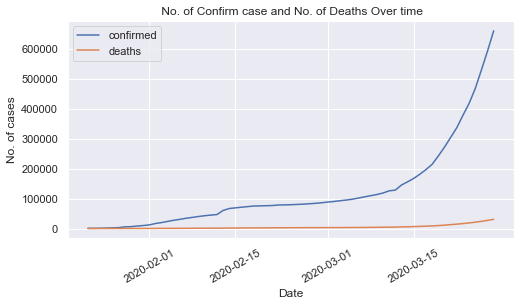

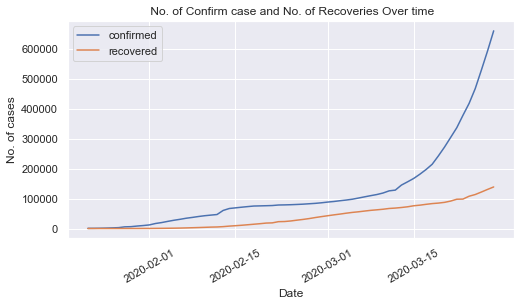

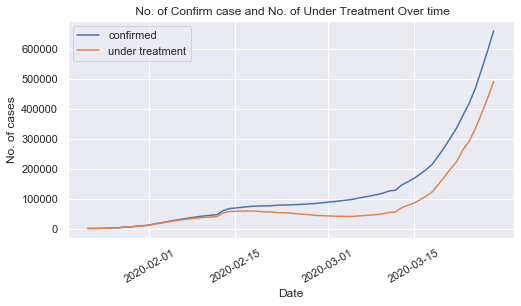

In [59]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.lineplot(x='Date',y='Confirmed',data=df_date,label='confirmed')
sns.lineplot(x='Date',y='Deaths',data=df_date,label='deaths')
plt.ylabel('No. of cases')
plt.legend()
plt.title(' No. of Confirm case and No. of Deaths Over time')

plt.xticks(rotation=30)
plt.show()

sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.lineplot(x='Date',y='Confirmed',data=df_date,label='confirmed')
sns.lineplot(x='Date',y='Recovered',data=df_date,label='recovered')
plt.ylabel('No. of cases')
plt.legend()
plt.title(' No. of Confirm case and No. of Recoveries Over time')

plt.xticks(rotation=30)

plt.show()

sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.lineplot(x='Date',y='Confirmed',data=df_date,label='confirmed')
sns.lineplot(x='Date',y='Under_treatment',data=df_date,label='under treatment')
plt.ylabel('No. of cases')
plt.legend()
plt.title(' No. of Confirm case and No. of Under Treatment Over time')

plt.xticks(rotation=30)

plt.show()

This shows that with time the confirmed number of cases increase exponentially. Number of deaths also increases but not as rapidly as the number of total cases. The number of recovered is not able to keep pace with the number of confirmed cases. As a result, the number of under treatment cases has started to increase exponentially from March. This is an alarming situation as it may lead to a shoratge of available hospital beds in some places.

Let us find how number of deaths, recovered and under treatment cases vary with time.

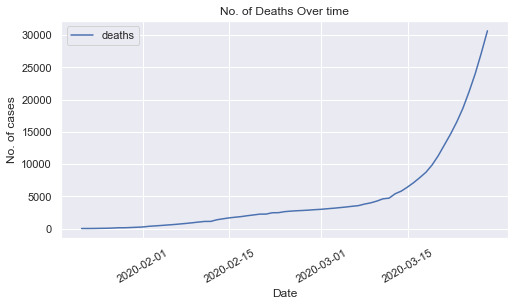

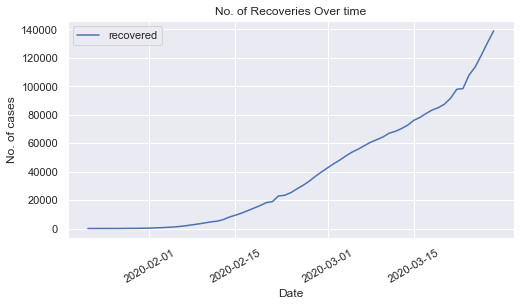

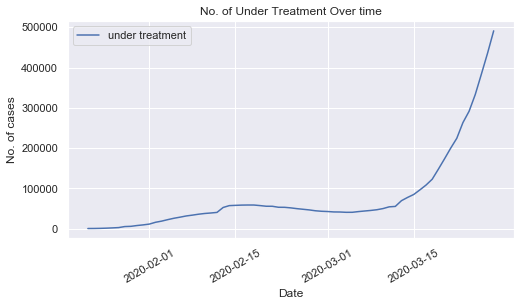

In [60]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.lineplot(x='Date',y='Deaths',data=df_date,label='deaths')
plt.ylabel('No. of cases')
plt.legend()
plt.title('No. of Deaths Over time')

plt.xticks(rotation=30)
plt.show()

sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.lineplot(x='Date',y='Recovered',data=df_date,label='recovered')
plt.ylabel('No. of cases')
plt.legend()
plt.title('No. of Recoveries Over time')

plt.xticks(rotation=30)

plt.show()

sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.lineplot(x='Date',y='Under_treatment',data=df_date,label='under treatment')
plt.ylabel('No. of cases')
plt.legend()
plt.title('No. of Under Treatment Over time')

plt.xticks(rotation=30)

plt.show()

It seems that the number of deaths is increasing exponentially and so is the number of under treatment cases, but number of recoveries varies almost linearly from March onwards.

#### According to Country, finding cumulative number of Confirmed, Death, Recovered and Under treatment cases.

In [61]:
df_country=df.groupby('Country/Region')['Confirmed','Deaths','Recovered','Under_treatment'].max().reset_index().sort_values('Confirmed',ascending=False)
df_country['Under_treatment']=df_country['Confirmed']-df_country['Recovered']-df_country['Deaths']
df_country.head()

,Country/Region,Confirmed,Deaths,Recovered,Under_treatment
165,US,121478,2026,1072,118380
82,Italy,92472,10023,12384,70065
150,Spain,73235,5982,12285,54968
34,China,67801,3177,62098,2526
63,Germany,57695,433,8481,48781


In [62]:
df_country['Confirmed'].sum()

640444

#### Analyzing the top 10 countries in terms of confirmed cases.

In [63]:
top_10=df_country[:10]
top_10.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Under_treatment
165,US,121478,2026,1072,118380
82,Italy,92472,10023,12384,70065
150,Spain,73235,5982,12285,54968
34,China,67801,3177,62098,2526
63,Germany,57695,433,8481,48781
59,France,37575,2314,5700,29561
78,Iran,35408,2517,11679,21212
169,United Kingdom,17089,1019,135,15935
155,Switzerland,14076,264,1530,12282
116,Netherlands,9762,639,3,9120


<function matplotlib.pyplot.show(*args, **kw)>

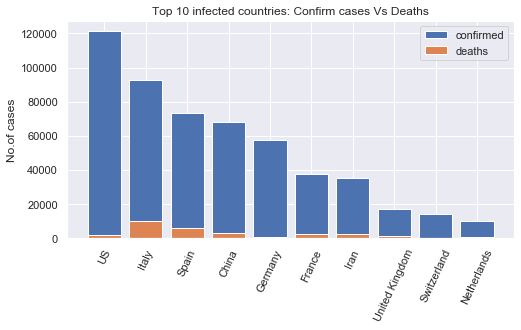

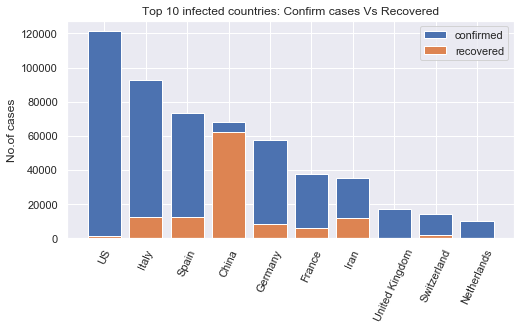

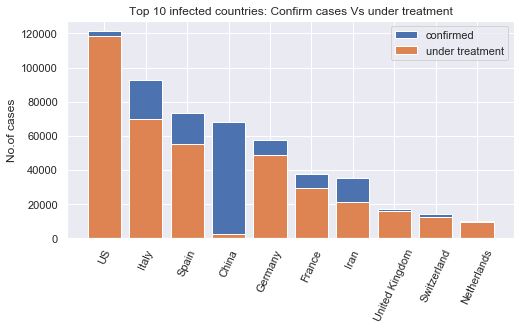

In [64]:
plt.figure(figsize=(8,4))
plt.bar(top_10['Country/Region'],top_10['Confirmed'],label='confirmed')
plt.bar(top_10['Country/Region'],top_10['Deaths'],label='deaths')
plt.ylabel('No.of cases')
plt.title('Top 10 infected countries: Confirm cases Vs Deaths')
plt.xticks(rotation=65)
plt.legend()
plt.show

plt.figure(figsize=(8,4))
plt.bar(top_10['Country/Region'],top_10['Confirmed'],label='confirmed')
plt.bar(top_10['Country/Region'],top_10['Recovered'],label='recovered')
plt.ylabel('No.of cases')
plt.title('Top 10 infected countries: Confirm cases Vs Recovered')
plt.xticks(rotation=65)
plt.legend()
plt.show

plt.figure(figsize=(8,4))
plt.bar(top_10['Country/Region'],top_10['Confirmed'],label='confirmed')
plt.bar(top_10['Country/Region'],top_10['Under_treatment'],label='under treatment')
plt.ylabel('No.of cases')
plt.title('Top 10 infected countries: Confirm cases Vs under treatment')
plt.xticks(rotation=65)
plt.legend()
plt.show

#### Calculating the death and recovery rates

In [65]:
df_country['Recovery rate %']=df_country['Recovered']/df_country['Confirmed']*100
df_country['Death rate %']=df_country['Deaths']/df_country['Confirmed']*100
df_country.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Under_treatment,Recovery rate %,Death rate %
165,US,121478,2026,1072,118380,0.882464,1.667792
82,Italy,92472,10023,12384,70065,13.392162,10.838957
150,Spain,73235,5982,12285,54968,16.774766,8.168226
34,China,67801,3177,62098,2526,91.588620,4.685772
63,Germany,57695,433,8481,48781,14.699714,0.750498
59,France,37575,2314,5700,29561,15.169661,6.158350
78,Iran,35408,2517,11679,21212,32.984071,7.108563
169,United Kingdom,17089,1019,135,15935,0.789982,5.962900
155,Switzerland,14076,264,1530,12282,10.869565,1.875533
116,Netherlands,9762,639,3,9120,0.030731,6.545790


In [66]:
top_10['Recovery rate %']=top_10['Recovered']/top_10['Confirmed']*100
top_10['Death rate %']=top_10['Deaths']/top_10['Confirmed']*100
top_10['Under Treatment %']=top_10['Under_treatment']/top_10['Confirmed']*100
top_10.head(10)

D:\anaconda_software\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\anaconda_software\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\anaconda_software\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

,Country/Region,Confirmed,Deaths,Recovered,Under_treatment,Recovery rate %,Death rate %,Under Treatment %
165,US,121478,2026,1072,118380,0.882464,1.667792,97.449744
82,Italy,92472,10023,12384,70065,13.392162,10.838957,75.768881
150,Spain,73235,5982,12285,54968,16.774766,8.168226,75.057008
34,China,67801,3177,62098,2526,91.588620,4.685772,3.725609
63,Germany,57695,433,8481,48781,14.699714,0.750498,84.549788
59,France,37575,2314,5700,29561,15.169661,6.158350,78.671989
78,Iran,35408,2517,11679,21212,32.984071,7.108563,59.907366
169,United Kingdom,17089,1019,135,15935,0.789982,5.962900,93.247118
155,Switzerland,14076,264,1530,12282,10.869565,1.875533,87.254902
116,Netherlands,9762,639,3,9120,0.030731,6.545790,93.423479


#### Data Visualization

Text(0.5, 1.0, ' Top 10 Infected country Recovery rate  in %')

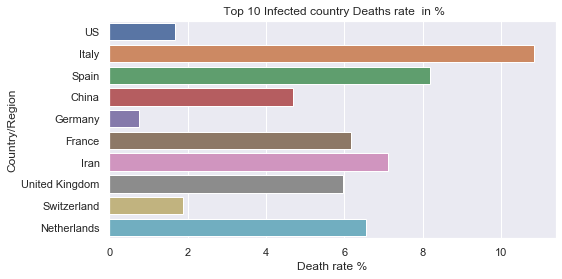

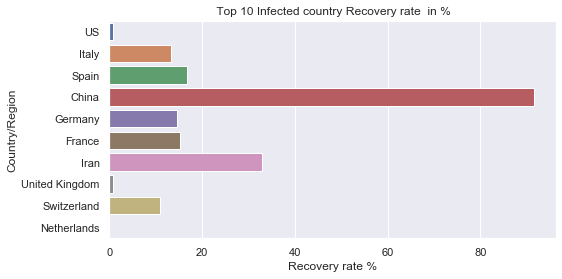

In [67]:
plt.figure(figsize=(8,4))
sns.barplot(y='Country/Region',x='Death rate %',data=top_10)
plt.title(' Top 10 Infected country Deaths rate  in %')

plt.figure(figsize=(8,4))
sns.barplot(y='Country/Region',x='Recovery rate %',data=top_10)
plt.title(' Top 10 Infected country Recovery rate  in %')

The above analysis shows that Italy is having the worst death rate of more than 10% whereas Germany has a death rate of less than 1%.
China has the best recovery rate of 91% whereas Neatherlands has the worst recovery rate of <1%.

In [68]:
train_date=df.groupby('Date')['Confirmed','Deaths'].sum()
train_date.head()

,Confirmed,Deaths
Date,,
2020-01-22,555,17
2020-01-23,654,18
2020-01-24,941,26
2020-01-25,1434,42
2020-01-26,2118,56


In [69]:
train_country=df.groupby('Country/Region')['Confirmed','Deaths'].max().reset_index().sort_values('Confirmed',ascending=False)
train_country.head()

,Country/Region,Confirmed,Deaths
165,US,121478,2026
82,Italy,92472,10023
150,Spain,73235,5982
34,China,67801,3177
63,Germany,57695,433


Highest number of cases are in US, followed by Italy, Spain and China. But the number of deaths is highest in Italy.

Lets look at the fatality rate of the countries.

In [70]:
train_country['Fatality rate in %']=train_country['Deaths']/train_country['Confirmed'] *100
train_country.sort_values('Fatality rate in %', ascending=False).head(10)

,Country/Region,Confirmed,Deaths,Fatality rate in %
61,Gambia,3,1,33.333333
118,Nicaragua,4,1,25.000000
152,Sudan,5,1,20.000000
27,Cabo Verde,5,1,20.000000
176,Zimbabwe,7,1,14.285714
60,Gabon,7,1,14.285714
82,Italy,92472,10023,10.838957
13,Bangladesh,48,5,10.416667
119,Niger,10,1,10.000000
139,San Marino,224,22,9.821429


Now, let us observe the death rate of top 10 countries having as per confirmed cases.

In [71]:
train_country.head(10)

,Country/Region,Confirmed,Deaths,Fatality rate in %
165,US,121478,2026,1.667792
82,Italy,92472,10023,10.838957
150,Spain,73235,5982,8.168226
34,China,67801,3177,4.685772
63,Germany,57695,433,0.750498
59,France,37575,2314,6.158350
78,Iran,35408,2517,7.108563
169,United Kingdom,17089,1019,5.962900
155,Switzerland,14076,264,1.875533
116,Netherlands,9762,639,6.545790


### Country wise trends analysis

Analyzing the trend in China

(array([18283, 18293, 18322, 18349], dtype=int64),
 <a list of 4 Text xticklabel objects>)

<Figure size 1296x576 with 0 Axes>

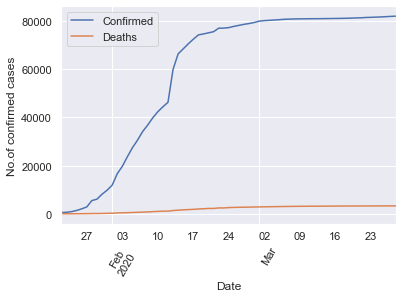

In [72]:
train_china=df[df['Country/Region']=='China']
train_china_sort=train_china.groupby('Date')['Confirmed','Deaths'].sum()
plt.figure(figsize=(18,8))
train_china_sort.plot()
plt.ylabel('No.of confirmed cases')
plt.legend()
plt.xticks(rotation=60)

Analyzing the trend in India

(array([18283, 18293, 18322, 18349], dtype=int64),
 <a list of 4 Text xticklabel objects>)

<Figure size 1296x576 with 0 Axes>

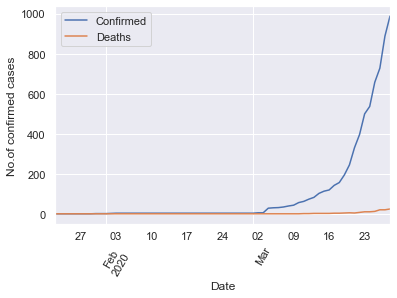

In [73]:
train_india=df[df['Country/Region']=='India']
train_india_sort=train_india.groupby('Date')['Confirmed','Deaths'].sum()
plt.figure(figsize=(18,8))
train_india_sort.plot()
plt.ylabel('No.of confirmed cases')
plt.legend()
plt.xticks(rotation=60)

Analyzing the trend in Italy

(array([18283, 18293, 18322, 18349], dtype=int64),
 <a list of 4 Text xticklabel objects>)

<Figure size 1296x576 with 0 Axes>

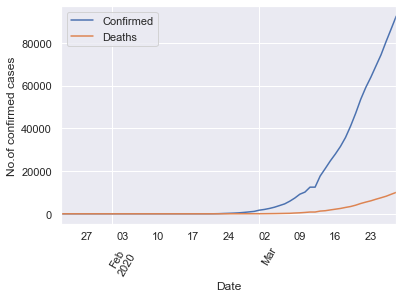

In [74]:
train_italy=df[df['Country/Region']=='Italy']
train_italy_sort=train_italy.groupby('Date')['Confirmed','Deaths'].sum()
plt.figure(figsize=(18,8))
train_italy_sort.plot()
plt.ylabel('No.of confirmed cases')
plt.legend()
plt.xticks(rotation=60)

Analyzing the trend in Iran

(array([18283, 18293, 18322, 18349], dtype=int64),
 <a list of 4 Text xticklabel objects>)

<Figure size 1296x576 with 0 Axes>

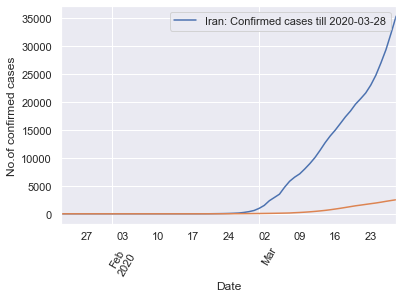

In [75]:
train_iran=df[df['Country/Region']=='Iran']
train_iran_sort=train_iran.groupby('Date')['Confirmed','Deaths'].sum()
plt.figure(figsize=(18,8))
train_iran_sort.plot()
plt.ylabel('No.of confirmed cases')
plt.legend(['Iran: Confirmed cases till 2020-03-28'])
plt.xticks(rotation=60)

### 2. Machine Learning Prediction Model
Here, we prepare the machine learning model based on train_ml.csv file and we predict the number of fatalities and confirmed cases for the dates and countries mentioned in the test.csv file.

In [76]:
train=pd.read_csv('train_ml.csv')
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [77]:
test=pd.read_csv('test.csv')
test.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [78]:
#to be run only once
train.drop(['Province/State','Country/Region'],axis=1,inplace=True)
test.drop(['Province/State','Country/Region'],axis=1,inplace=True)
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17608 entries, 0 to 17607
Data columns (total 6 columns):
Id                17608 non-null int64
Lat               17608 non-null float64
Long              17608 non-null float64
Date              17608 non-null object
ConfirmedCases    17608 non-null float64
Fatalities        17608 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 825.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 4 columns):
ForecastId    12212 non-null int64
Lat           12212 non-null float64
Long          12212 non-null float64
Date          12212 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 381.7+ KB


None

In [79]:
train.head()

,Id,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,33.0,65.0,2020-01-22,0.0,0.0
1,2,33.0,65.0,2020-01-23,0.0,0.0
2,3,33.0,65.0,2020-01-24,0.0,0.0
3,4,33.0,65.0,2020-01-25,0.0,0.0
4,5,33.0,65.0,2020-01-26,0.0,0.0


In [80]:
test.head()

,ForecastId,Lat,Long,Date
0,1,33.0,65.0,2020-03-12
1,2,33.0,65.0,2020-03-13
2,3,33.0,65.0,2020-03-14
3,4,33.0,65.0,2020-03-15
4,5,33.0,65.0,2020-03-16


In [81]:
#to be run only once
train['Date'] = train['Date'].apply(lambda x: x.replace("-",""))
train['Date']=train['Date'].astype(int)

In [82]:
train.head()

,Id,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,33.0,65.0,20200122,0.0,0.0
1,2,33.0,65.0,20200123,0.0,0.0
2,3,33.0,65.0,20200124,0.0,0.0
3,4,33.0,65.0,20200125,0.0,0.0
4,5,33.0,65.0,20200126,0.0,0.0


In [83]:
# to be run only once
test["Date"] = test["Date"].apply(lambda x: x.replace("-",""))
test["Date"]  = test["Date"].astype(int)

In [84]:
test.head()

,ForecastId,Lat,Long,Date
0,1,33.0,65.0,20200312
1,2,33.0,65.0,20200313
2,3,33.0,65.0,20200314
3,4,33.0,65.0,20200315
4,5,33.0,65.0,20200316


Preparing xtrain and ytrain data

In [85]:
x_train=train.drop(['Id','ConfirmedCases','Fatalities'],axis=1)
y_confrm=train[['ConfirmedCases']]
y_fat=train[['Fatalities']]

x_test=test.drop('ForecastId',axis=1)
x_test.head()

,Lat,Long,Date
0,33.0,65.0,20200312
1,33.0,65.0,20200313
2,33.0,65.0,20200314
3,33.0,65.0,20200315
4,33.0,65.0,20200316


### Using Random Forest Regressor

1. Confirmed Cases predition for the dates and countries mentioned in the test.csv file.

In [86]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor(random_state=42)
rand_reg.fit(x_train,y_confrm)

pred_grid1 = rand_reg.predict(x_test)
pred_grid1 = pd.DataFrame(pred_grid1).round()
pred_grid1.columns = ["ConfirmedCases_prediction"]
pred_grid1.head()

D:\anaconda_software\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

D:\anaconda_software\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



,ConfirmedCases_prediction
0,7.0
1,7.0
2,11.0
3,19.0
4,19.0


In [87]:
pred_grid1.sort_values('ConfirmedCases_prediction',ascending=False)
pred_grid1.head()

,ConfirmedCases_prediction
0,7.0
1,7.0
2,11.0
3,19.0
4,19.0


2. Fatalities prediction for the dates and countries mentioned in the test.csv file.

In [88]:
rand_reg.fit(x_train,y_fat)

pred_grid2 = rand_reg.predict(x_test)
pred_grid2 = pd.DataFrame(pred_grid2).round()
pred_grid2.columns = ["Fatality_prediction"]
pred_grid2.head()

D:\anaconda_software\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



,Fatality_prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
